# Abstract

El análisis se enfoca en identificar relaciones entre las variables físico-químicas del vino —como la acidez fija, acidez volátil, ácido cítrico, azúcares residuales, cloruros, dióxido de azufre libre y total, densidad, pH, sulfatos y contenido alcohólico— con la variable objetivo “quality”, que representa la calidad del vino según una escala del 0 al 10. Esta investigación se guía por preguntas como: ¿Qué variables tienen mayor influencia en la calidad percibida del vino? ¿Existe una relación entre el nivel de alcohol y la calidad del vino? ¿Cómo interactúan múltiples factores para determinar vinos de alta calidad?

Se emplean técnicas de análisis exploratorio de datos (EDA) incluyendo visualizaciones univariadas, bivariadas y multivariadas, complementadas con resúmenes numéricos. Las gráficas permiten observar distribuciones, detectar valores atípicos, correlaciones y patrones relevantes que ayudan a responder las preguntas planteadas. Asimismo, se examinan posibles valores perdidos en el dataset para asegurar la integridad de los análisis realizados.

Durante el desarrollo del proyecto, se generan hipótesis que serán validadas empíricamente, como por ejemplo: “los vinos con mayor grado alcohólico tienden a tener una mejor calidad”, o “altos niveles de acidez volátil están relacionados con una menor calidad del vino”. La validación o refutación de estas hipótesis contribuye a una mejor comprensión del comportamiento del vino en función de sus componentes químicos, lo cual podría tener aplicaciones prácticas en la industria vitivinícola para mejorar procesos de producción y control de calidad.

Este análisis no solo proporciona insights descriptivos del dataset, sino que también sirve como punto de partida para futuras aplicaciones de modelos predictivos que permitan estimar la calidad del vino a partir de sus propiedades físico-químicas. En resumen, este proyecto busca, mediante la visualización y análisis de datos, extraer conocimiento útil sobre los factores que determinan un vino tinto de alta calidad.

## Preguntas
1. ¿Qué variables físico-químicas tienen mayor correlación con la calidad del vino?

2. ¿Existe una relación positiva entre el contenido de alcohol y la calidad del vino?

3. ¿Cómo influye la acidez volátil en la percepción de calidad del vino?

4. ¿Los vinos con menor densidad presentan mejores puntuaciones de calidad?

5. ¿Qué combinaciones de variables están presentes en los vinos de calidad alta (7 o más)?

## Hipotesis

- H1: A mayor contenido de alcohol, mayor es la calidad del vino.

- H2: Un nivel alto de acidez volátil está asociado a una menor calidad del vino.

- H3: Vinos con niveles moderados de sulfatos y menor densidad tienen mayor probabilidad de ser de calidad alta.

- H4: La interacción entre varios factores (como pH, alcohol y cloruros) puede predecir mejor la calidad que una sola variable.

- H5: Los vinos con alta calidad presentan un rango específico de parámetros físico-químicos, diferente al de vinos con calificaciones bajas.

In [1]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Opciones
pd.set_option('display.max_columns', None)

In [73]:
df = pd.read_csv("Winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

Filas y columnas: (1599, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [7]:
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


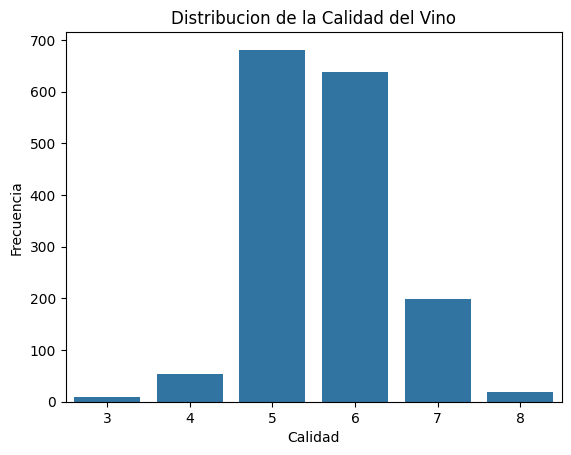

In [8]:
# Histograma de la variable calidad
sns.countplot(x='quality', data=df)
plt.title('Distribucion de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

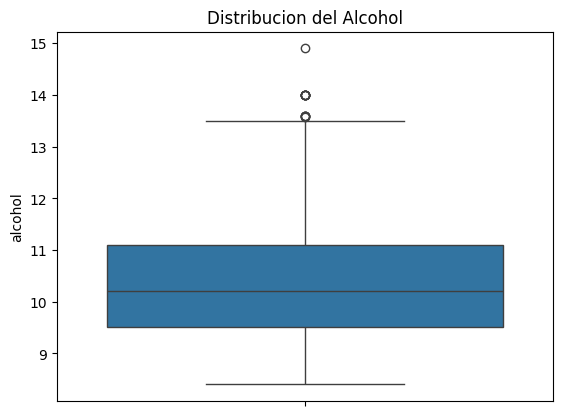

In [9]:
# Boxplot de alcohol
sns.boxplot(y='alcohol', data=df)
plt.title('Distribucion del Alcohol')
plt.show()

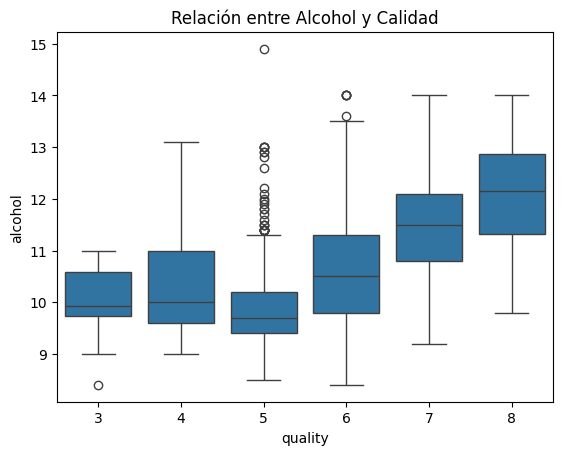

In [10]:
# Alcohol vs Calidad
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Relación entre Alcohol y Calidad')
plt.show()

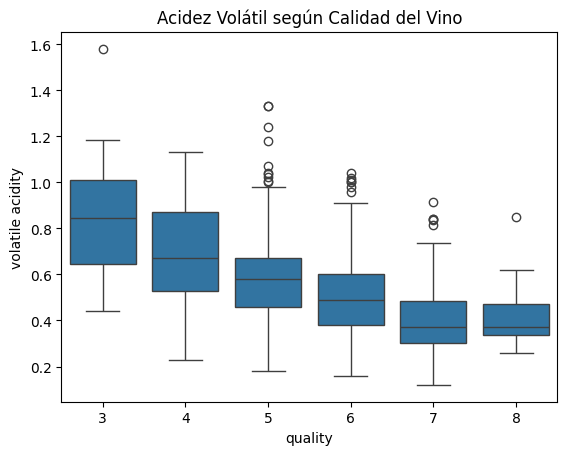

In [11]:
# Acidez volátil vs Calidad
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Acidez Volátil según Calidad del Vino')
plt.show()

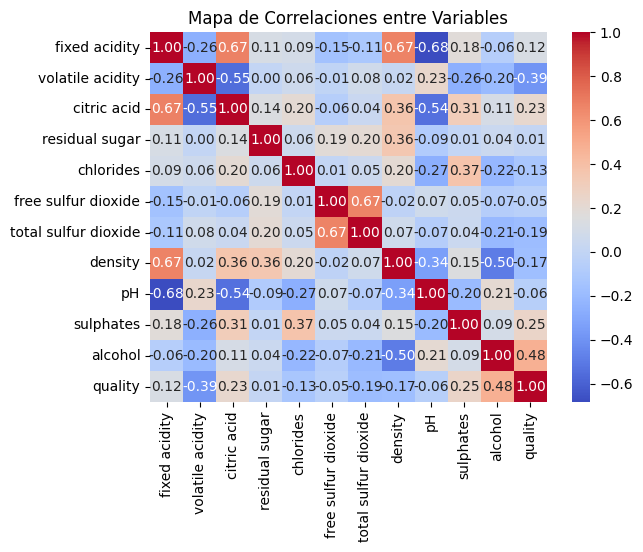

In [12]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlaciones entre Variables')
plt.show()

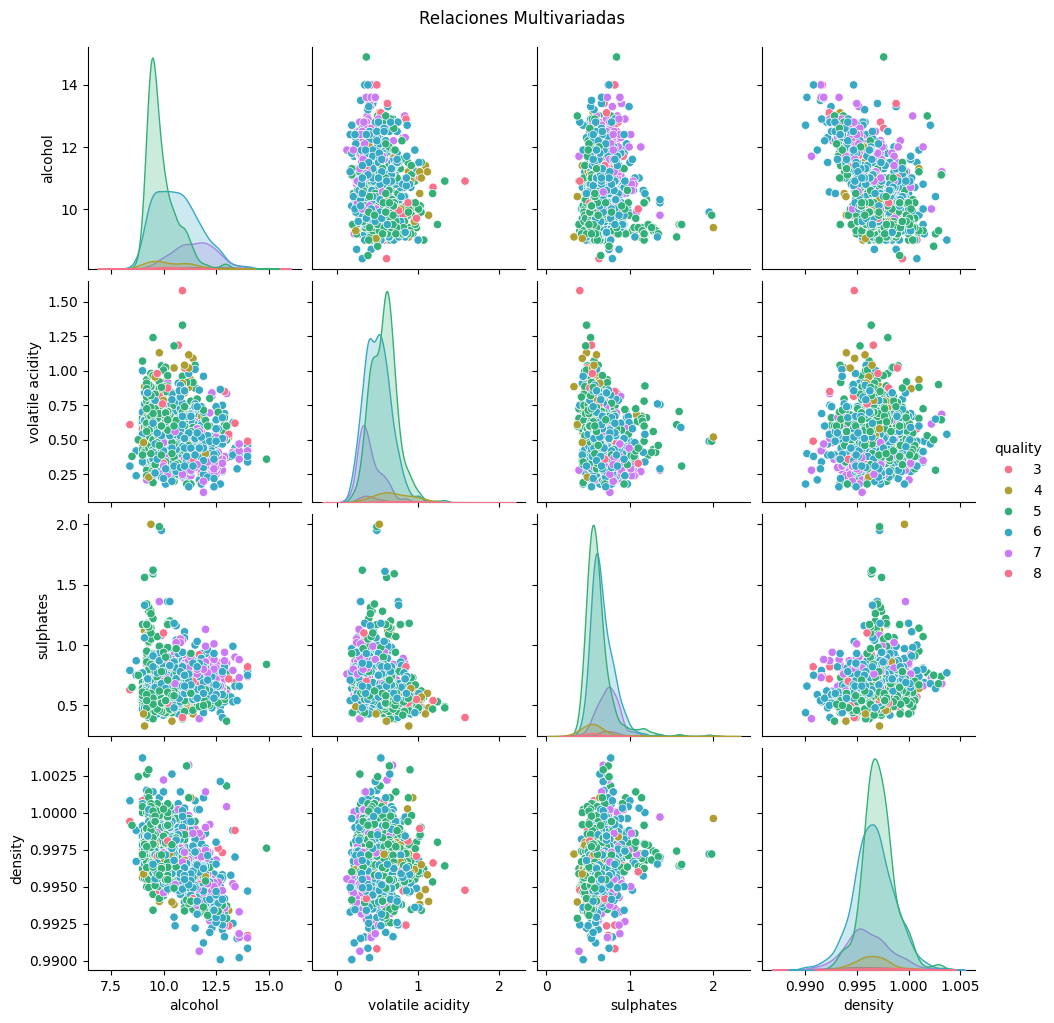

In [13]:
subset = df[['alcohol', 'volatile acidity', 'sulphates', 'density', 'quality']]
sns.pairplot(subset, hue='quality', palette='husl')
plt.suptitle('Relaciones Multivariadas', y=1.02)
plt.show()

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


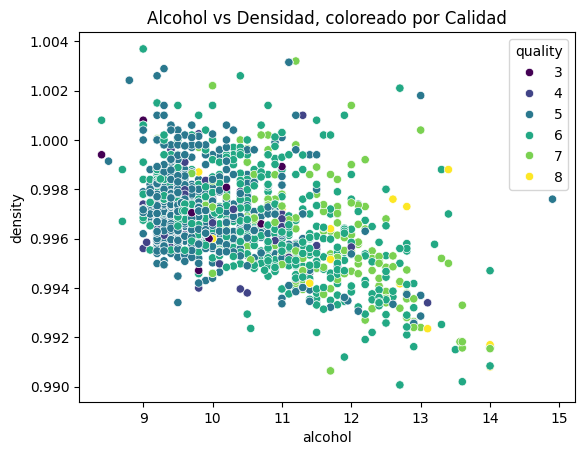

In [15]:
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality', palette='viridis')
plt.title('Alcohol vs Densidad, coloreado por Calidad')
plt.show()

### Vinos con mayor alcohol y menor densidad tienden a tener mejor calidad (valida H1 y H3).

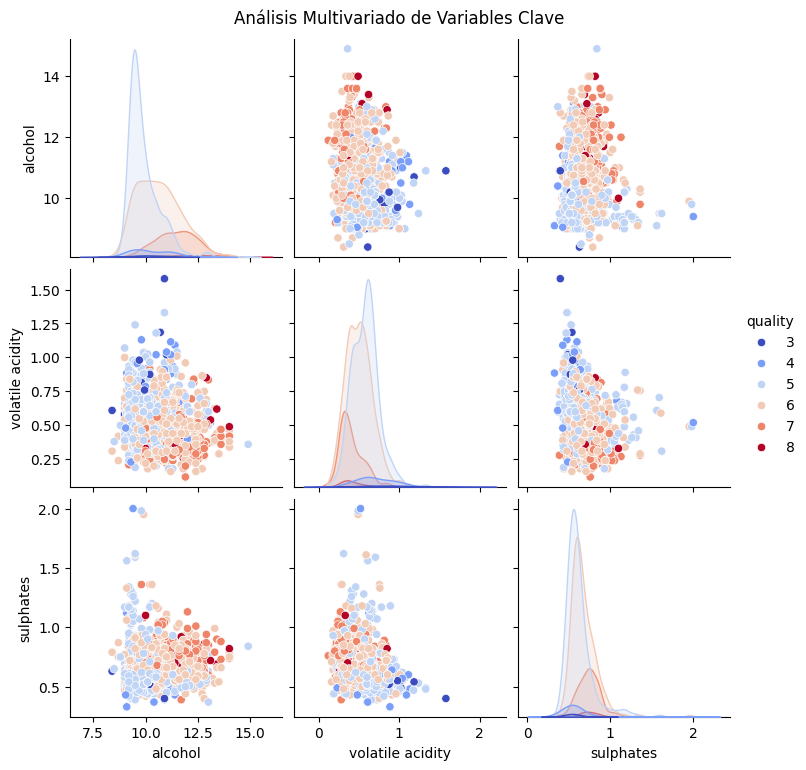

In [16]:
subset = df[['alcohol', 'volatile acidity', 'sulphates', 'quality']]
sns.pairplot(subset, hue='quality', palette='coolwarm')
plt.suptitle('Análisis Multivariado de Variables Clave', y=1.02)
plt.show()


### Confirma que alcohol se asocia positivamente con calidad. Y Volatile acidity muestra una tendencia inversa (confirma H2).

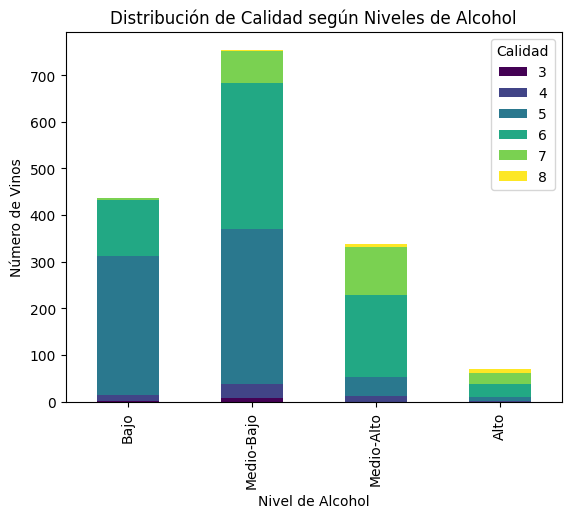

In [17]:
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=[8, 9.5, 11, 12.5, 14], labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
alcohol_quality = df.groupby(['alcohol_bin', 'quality']).size().unstack().fillna(0)

# Gráfico de barras apiladas
alcohol_quality.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de Calidad según Niveles de Alcohol')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Número de Vinos')
plt.legend(title='Calidad')
plt.show()

### A medida que aumenta el nivel de alcohol, disminuye la frecuencia de vinos de baja calidad y aumenta la proporción relativa de vinos de calidad 7 u 8, lo cual respalda parcialmente la hipótesis H1.

In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bajo
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medio-Bajo
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medio-Bajo
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medio-Bajo
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medio-Bajo
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medio-Alto
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medio-Bajo
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medio-Bajo


In [19]:
#df['calidad_cat'] = df['quality'].apply(lambda x: 'Alta' if x >= 7 else ('Media' if x == 6 else 'Baja'))

#sns.boxplot(x='calidad_cat', y='pH', hue='alcohol_bin', data=df)
#plt.title('Distribución del pH según calidad y nivel de alcohol')
#plt.show()

### Los vinos de calidad alta tienen un pH más controlado (más concentrado) y, en general, se concentran en niveles medios-altos de alcohol.

## Valores Perdidos


In [74]:
valores_nulos = df.isnull().sum()

print("Valores perdidos por columna:")
print(valores_nulos[valores_nulos > 0])

Valores perdidos por columna:
Series([], dtype: int64)


In [75]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
df.dropna(inplace=True)

In [77]:
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


## Elegir un método de feature selection para reducir la dimensionalidad del dataset.

In [78]:
df = pd.get_dummies(df, drop_first=True)

In [79]:
from sklearn.feature_selection import SelectKBest, chi2

In [80]:
X=df.drop('quality',axis=1)
y=df['quality']

In [81]:
# Selección de características
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

In [82]:
scores = selector.scores_
features_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': scores
}).sort_values(by="Chi2 Score", ascending=False)

In [83]:
print(features_scores)

                 Feature   Chi2 Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655
7                density     0.000230


In [84]:
X = X.drop(['density', 'pH', 'chlorides', 'residual sugar', 'sulphates'], axis=1)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_scaled = scaler.fit_transform(X.astype(int))
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Humbral del 5%


## Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [91]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
y_pred = rf.predict(X_test)

In [93]:
importancias = rf.feature_importances_
nombres = X.columns

In [94]:
feat_importancia = pd.DataFrame({
    "Variable": nombres,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

In [97]:
feat_importancia

,Variable,Importancia
5,alcohol,0.342623
1,volatile acidity,0.203062
0,fixed acidity,0.129507
4,total sulfur dioxide,0.129238
2,citric acid,0.106233
3,free sulfur dioxide,0.089337


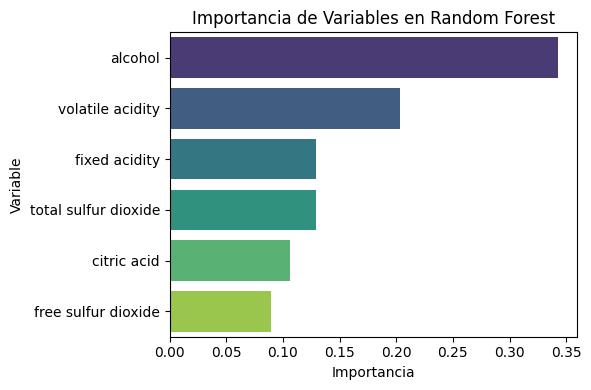

In [95]:
plt.figure(figsize=(6,4))
sns.barplot(data=feat_importancia, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de Variables en Random Forest")
plt.tight_layout()
plt.show()

## Cálculo de métricas básicas para validar el modelo

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.588741949697262
R²: 0.45330556753537465


## Conclusion

El modelo RF permite identificar de forma objetiva cuáles propiedades químicas del vino están más relacionadas con su calidad. Si bien el modelo no es perfecto, ya que podrían realizarse mejoras en la preparación de los datos (como la creación de nuevas variables, tratamiento de outliers o normalización), los resultados obtenidos son razonables.

El valor de RMSE (0.589) indica un error promedio moderado en las predicciones del modelo, mientras que el R² (0.45) señala que el modelo explica aproximadamente el 45% de la variabilidad en la calidad del vino. Esto representa un nivel intermedio de precisión, esperable en un problema multicausal como este, donde existen factores sensoriales o subjetivos no incluidos en el dataset.